
# Project: Investigate a  tmdb-movies Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

## Introduction

Dataset 
Choosing the TMDb movies dataset for Investigating data. 
This dataset contains info around 10,000 movies , dataset from (TMDb), icluding different variables

# Qusetions:

-Which Genre Has The Highest Release Of Movies?


-What is the relation between number of movies and years?

-Have revenues increased over time?

-budget and revenue of the associated to movie :

-What kinds of properties are associated with movies that have high revenues?

-Which year has the highest release of movies?

-How profit, budget and revenues are moving over time?

-Relationship between profit and popularity?



In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt






<a id='wrangling'></a>
## Data Wrangling

Loading Dataset:

### General Properties


dataset contains:



Total Rows = 10866

Total Columnd = 21

Dataset have  null values


In [2]:
# Load data
data = pd.read_csv('tmdb-movies.csv')

In [3]:
data.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [4]:
data.shape

(10866, 21)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [6]:
data.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [7]:
data.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [8]:
data.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [9]:
data['genres'].head()

0    Action|Adventure|Science Fiction|Thriller
1    Action|Adventure|Science Fiction|Thriller
2           Adventure|Science Fiction|Thriller
3     Action|Adventure|Science Fiction|Fantasy
4                        Action|Crime|Thriller
Name: genres, dtype: object


### Data Cleaning (Remove and modify The unnecessary Information))

Check and  remove duplicate rows

Remove unused columns 

Remove zero values that apper in revenue or budget

We have a release date but need to change it format to datetime format


# Make copy of dataset 

In [10]:
Cleaned_data = data

## check duplicate values from the dataset

In [11]:
m = Cleaned_data.duplicated()
sum(m)    

1

-  we have 1 row that is duplicate

 ## drop duplicate values from the dataset

In [12]:
Cleaned_data.drop_duplicates(inplace = True)

In [13]:
#data after drop duplicate
Cleaned_data.shape

(10865, 21)

## make release date in datetime format


In [14]:
Cleaned_data['release_date'] = pd.to_datetime(Cleaned_data['release_date'])

In [15]:
Cleaned_data['release_date'].head(3)

0   2015-06-09
1   2015-05-13
2   2015-03-18
Name: release_date, dtype: datetime64[ns]

- Now date is in datetime format

## remove unused columns
The columns: imdb_id, homepage,tagline, overview 

In [16]:
Cleaned_data.drop(['homepage','imdb_id','cast', 'tagline', 'overview'],axis=1,inplace=True)

In [17]:
Cleaned_data.isnull().sum()

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
director                  44
keywords                1493
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [18]:

# Drop the null values
Cleaned_data = Cleaned_data.dropna()

In [19]:
Cleaned_data.isnull().sum()

id                      0
popularity              0
budget                  0
revenue                 0
original_title          0
director                0
keywords                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

- data set shape after drop null values

In [20]:
Cleaned_data.shape

(8691, 16)

# Calculate profit from revenue and budget

In [21]:
 profit = Cleaned_data["revenue"] - Cleaned_data["budget"]

In [22]:
Cleaned_data.insert(2,'profit', profit)

In [23]:
Cleaned_data.head(3)

,id,popularity,profit,budget,revenue,original_title,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,1363528810,150000000,1513528810,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,228436354,150000000,378436354,Mad Max: Fury Road,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,185238201,110000000,295238201,Insurgent,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08


# Drop zero value


# The budget and revenue have 0 value 

In [24]:
# Checking 0 value
#print("# of rows whith zero value in Budget Column:",Cleaned_data[(Cleaned_data['budget']==0)].shape[0])
#print("# of rows whith zero value in Revenue Column:",Cleaned_data[(Cleaned_data['revenue']==0)].shape[0])

## ----------------------------------------------------------------------------------------------------------

<a id='eda'></a>
## Exploratory Data Analysis



#  Research Question 1 :Which Genre Has The Highest Release Of Movies?
- split data in geners column 
- count each item in geners
- plot the geners

In [25]:
def cout_of_gen(i):
    data1 = Cleaned_data[i].str.cat(sep = '|')
    data2 = pd.Series(data1.split('|')).value_counts(ascending=False)
    return data2


Text(0,0.5,'genres')

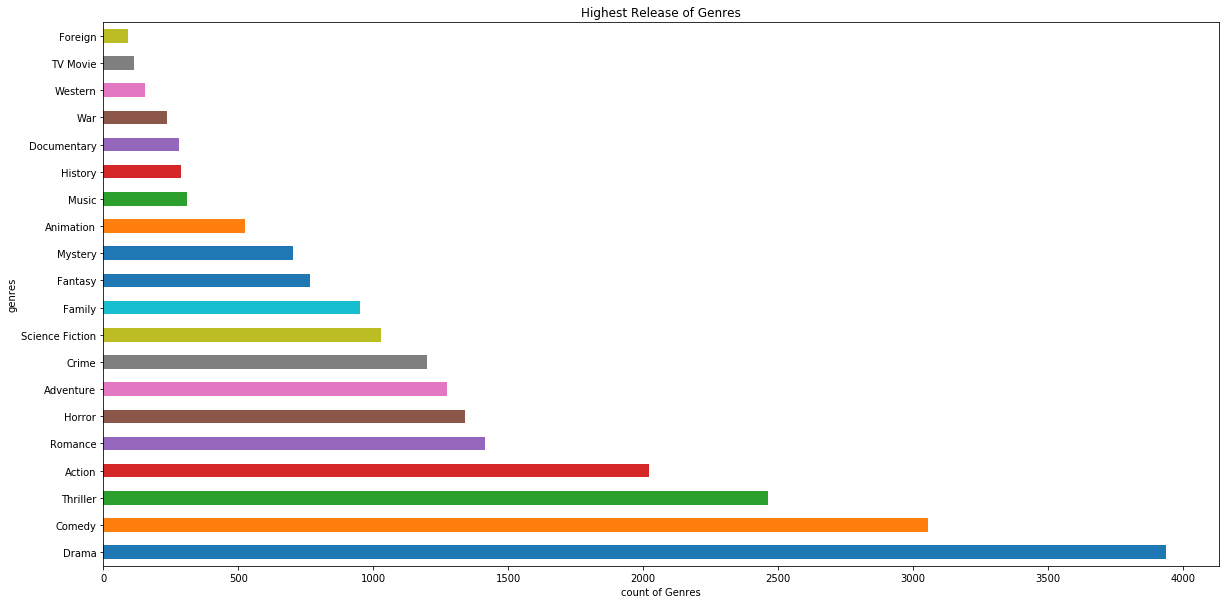

In [26]:

plt.figure(figsize=(20,10))
gen_mov = cout_of_gen('genres')
gen_mov.plot(kind= 'barh')
plt.title("Highest Release of Genres")
plt.xlabel("count of Genres")
plt.ylabel("genres")

# Conclusion
- Drama , Comedy, Thriller and Action are the most geners

# Research Question 2  : What is the relation between number of movies and years?

- group by "release_year" column and count each genres for each years

In [27]:
High_year = Cleaned_data.groupby(['release_year'])['genres'].count()

In [28]:
High_year.head(3)

release_year
1960    30
1961    28
1962    30
Name: genres, dtype: int64

Text(0,0.5,'Number of Geners')

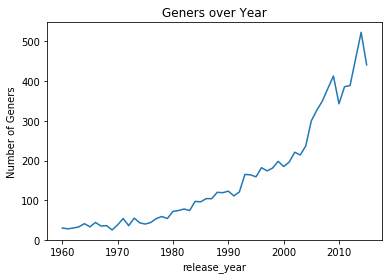

In [42]:
High_year.plot('line')
plt.title("Geners over Year")
plt.ylabel("Number of Geners")

# Conclusion

- The movies are increasing over years 

# Research Question 3: Have revenues increased over time?

- group "released_year" column and count the mean of revenues 

In [30]:
revenue = Cleaned_data.groupby('release_year')['revenue'].mean()


Text(0,0.5,'Mean of Revenue')

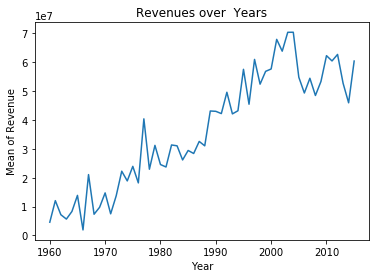

In [31]:
plt.plot(revenue)
plt.title('Revenues over  Years')
plt.xlabel('Year')
plt.ylabel('Mean of Revenue')

# Conclusion

- The revenue increase over years.

# Research Question 4 :budget and revenue of the associated to movie :

- Relationship between budget and revenue 

Text(0.5,1,'Revenue_adj and Budget_adj')

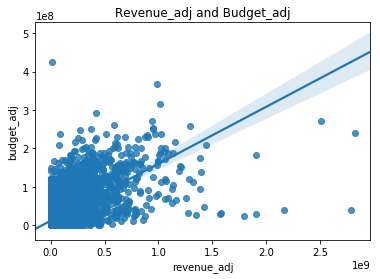

In [41]:
sns.regplot(x=Cleaned_data['revenue_adj'], y=Cleaned_data['budget_adj'])
plt.title("Revenue_adj and Budget_adj")

# Conclusion:

- The revenues do increase slightly at higher levels.

- There is a good possibility that movies with higher investments result in better revenues.

#  Research Question 5 :What kinds of properties are associated with movies that have high revenues?

- revenue & popularity
- revenue & vote_average
- revenue & runtime
- revenue & budget

Text(0.5,1,'Revenue and Popularity ')

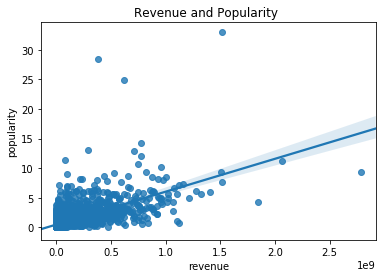

In [40]:
#revenue & popularity
sns.regplot(x=Cleaned_data['revenue'], y=Cleaned_data['popularity'])
plt.title("Revenue and Popularity ")

# Conclusion

- The revenue seems to be increasing with popularity. We can say that if the popularity of movie is high then the revenue of the movie may be high.

Text(0.5,1,'Revenue and vote_average ')

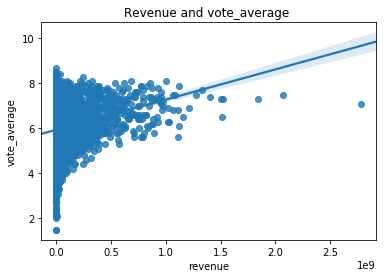

In [39]:
#revenue & vote_average
sns.regplot(x=Cleaned_data['revenue'], y=Cleaned_data['vote_average'])
plt.title("Revenue and vote_average ")

# Conclusion:
- The correlation between revenue and vote average is not highly related to the revenue.

Text(0.5,1,'runtime and Revenue')

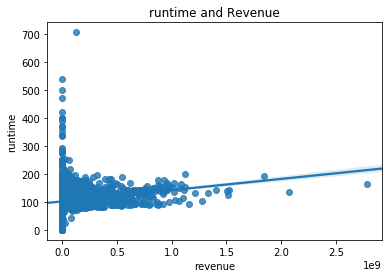

In [38]:
#revenue & runtime
sns.regplot(x=Cleaned_data['revenue'], y=Cleaned_data['runtime'])
plt.title("runtime and Revenue")

# Conclusion:
- The correlation between revenue and runtime is not highly related to the revenue.

Text(0.5,1,'Budget and Revenue')

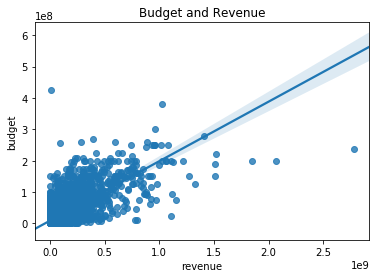

In [37]:
#revenue & budget
sns.regplot(x=Cleaned_data['revenue'], y=Cleaned_data['budget'])
plt.title("Budget and Revenue")

# Conclusion:
- The revenues do increase slightly at higher levels but the number of movies with high budgets seem scarce. There is a good possibility that movies with higher investments result in better revenues.

# Histogram for Revenue and Budget

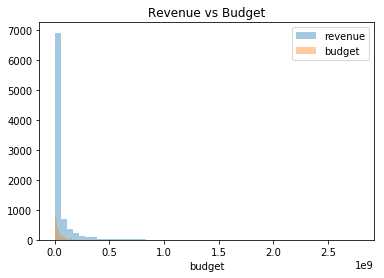

In [44]:
sns.distplot(a=Cleaned_data['revenue'], label="revenue", kde=False)
sns.distplot(a=Cleaned_data['budget'], label="budget", kde=False)
plt.title("Revenue vs Budget")
plt.legend()



# Conclusion:
- It is clear the difference between revenue and budget

#  Research Question 6: Which year has the highest release of movies?
- calculate the number of movies for each year
- sorting by year

In [45]:
movies_each_year = Cleaned_data['release_year'].value_counts()

In [46]:
movies_each_year.sort_index()

1960     30
1961     28
1962     30
1963     33
1964     41
1965     33
1966     44
1967     35
1968     36
1969     25
1970     38
1971     54
1972     36
1973     55
1974     43
1975     40
1976     44
1977     54
1978     59
1979     54
1980     72
1981     74
1982     78
1983     74
1984     97
1985     96
1986    104
1987    104
1988    120
1989    119
1990    123
1991    111
1992    121
1993    165
1994    164
1995    159
1996    182
1997    174
1998    181
1999    198
2000    185
2001    196
2002    221
2003    214
2004    237
2005    300
2006    327
2007    350
2008    382
2009    413
2010    343
2011    386
2012    389
2013    456
2014    523
2015    441
Name: release_year, dtype: int64

Text(0,0.5,'Year')

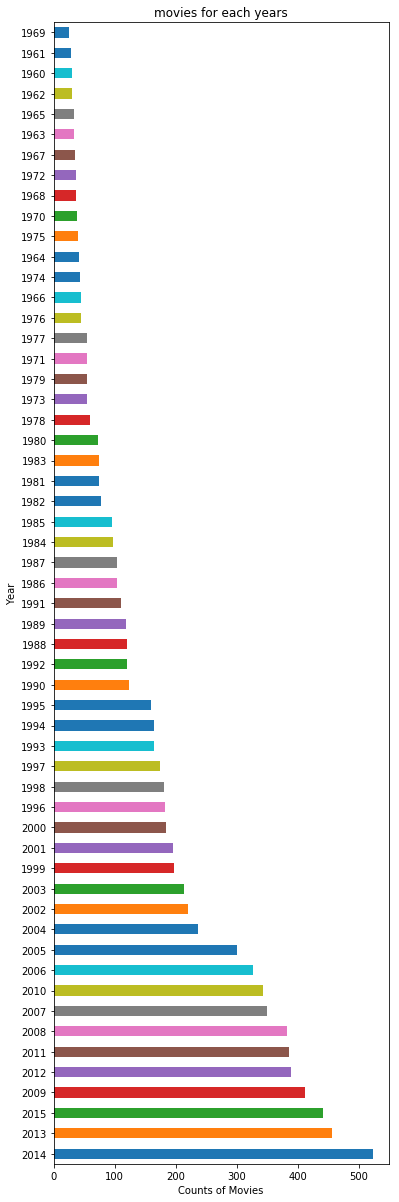

In [47]:
plt.figure(figsize=(6,21))
movies_each_year.plot(kind='barh')
plt.title('movies for each years')
plt.xlabel('Counts of Movies')
plt.ylabel("Year")

# Conclusion:
- 2014 is the year have the most number of movies

# Research Question 7 :How profit, budget and revenues are behavior over time?

In [48]:
features_considered = ['profit', 'budget', 'revenue']

In [49]:
features = Cleaned_data[features_considered]
features.index = Cleaned_data['release_date']
features.head()

,profit,budget,revenue
release_date,,,
2015-06-09,1363528810,150000000,1513528810
2015-05-13,228436354,150000000,378436354
2015-03-18,185238201,110000000,295238201
2015-12-15,1868178225,200000000,2068178225
2015-04-01,1316249360,190000000,1506249360


In [50]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12, 6)
mpl.rcParams['axes.grid'] = False

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f2ba8540b70>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f2ba8299d68>], dtype=object)

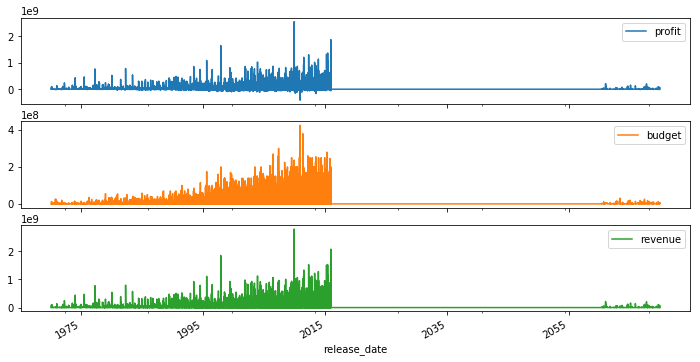

In [51]:
features.plot(subplots=True)

# Conclusion:

- movies with higher investments result in better Profit.

# Research Question 8 :Relationship between profit and popularity?

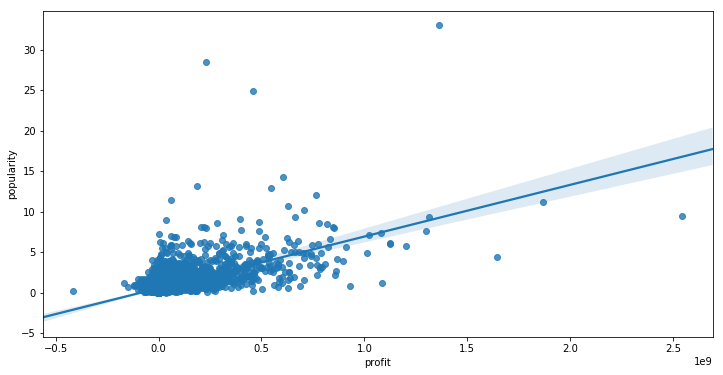

In [52]:
#Profit & popularity
sns.regplot(x=Cleaned_data['profit'], y=Cleaned_data['popularity'])

# Conclusion:
- Most Profit Movies, Most popularity Movies

<a id='conclusions'></a>
##  Final Conclusions
- Drame, Comedy, Thriller and Action have most genres
- Year 2014 has maximum Number Of Movies Release 
- Revenue is directly connected to the budget
- Revenue and budget have a weakly positive correlation. 
- Revenue and vote_average have a good positive correlation. 
- Revenue and runtime have a good positive correlation. 
- the number of movies are increasing over years.
- Revenue and popularity have positive correlation, movies with higher revenues tend to be more popular
- Popularity and profit have positive correlation. It means that movie with high popularity tends to earn high profit.
- Revenues over the years have increased



<a id='conclusions'></a>

# limitations 

- Missing values in the data effect the results.
- inccorect datatype. (date)
- Duplicates in the data 


In [59]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0